# Housing Price Prediction

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

*Load Datasets*

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", delim_whitespace=True, names=column_names)

C:\Users\dell\AppData\Local\Temp\ipykernel_17792\1943482984.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, names=column_names)


*Define features (X) and target (y)*

In [6]:
X = df.drop(columns=['MEDV'])  # All columns except the target column
y = df['MEDV']  # Target column (housing price)

*Split the dataset into training and testing sets*

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Train a Linear Regression model*

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

*Make predictions*

In [9]:
y_pred = model.predict(X_test)

*Evaluate the model*

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [11]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3.189091965887874
Mean Squared Error: 24.29111947497374
Root Mean Squared Error: 4.928602182665359


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

*Data Visualization*

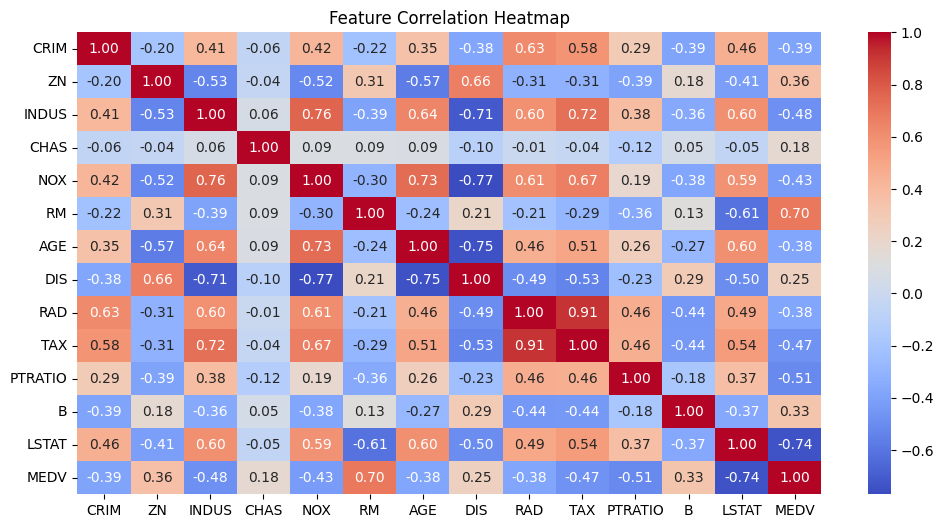

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

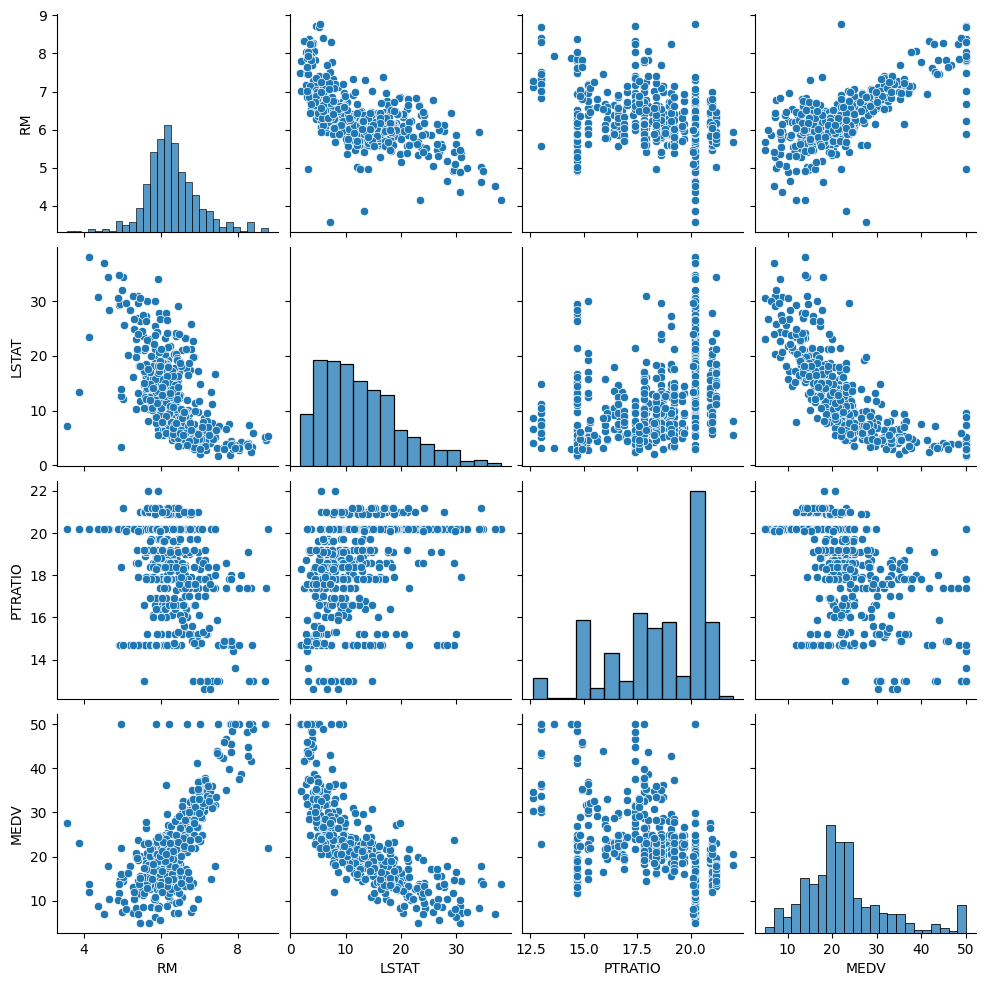

In [18]:
sns.pairplot(df, vars=['RM', 'LSTAT', 'PTRATIO', 'MEDV'])
plt.show()

*Visualizing Predictions*

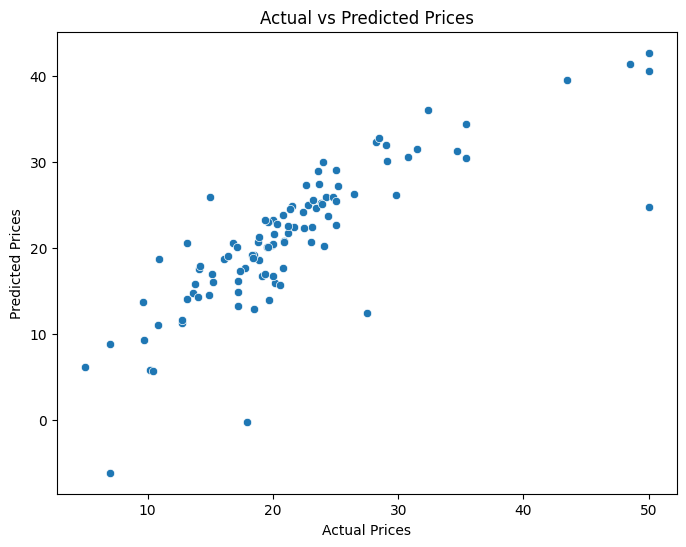

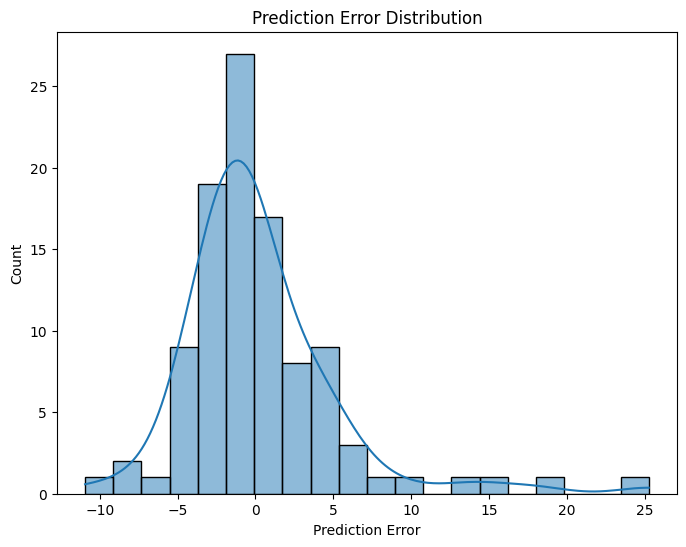

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, bins=20, kde=True)
plt.xlabel("Prediction Error")
plt.title("Prediction Error Distribution")
plt.show()